In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your cleaned dataset
df = pd.read_csv("/content/filtered_data_na")


In [ ]:
df.drop(columns=["RegimenARTCombinationEncoded", "RegimenLineCombinationEncoded"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51637 entries, 0 to 51636
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Whostage                                           51637 non-null  int64  
 1   Current_Age                                        51637 non-null  int64  
 2   Educationallevel                                   44242 non-null  float64
 3   MaritalStatus                                      49504 non-null  float64
 4   Duration on ART (Days)                             51637 non-null  int64  
 5   bp_sys                                             51637 non-null  int64  
 6   bp_dia                                             51637 non-null  int64  
 7   PATIENT HAS DIED                                   51637 non-null  bool   
 8   Sex_Female                                         51637 non-null  bool   
 9   Sex_Ma

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51637 entries, 0 to 51636
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Whostage                                           51637 non-null  int64  
 1   Current_Age                                        51637 non-null  int64  
 2   Educationallevel                                   51637 non-null  float64
 3   MaritalStatus                                      51637 non-null  float64
 4   Duration on ART (Days)                             51637 non-null  int64  
 5   bp_sys                                             51637 non-null  int64  
 6   bp_dia                                             51637 non-null  int64  
 7   PATIENT HAS DIED                                   51637 non-null  bool   
 8   Sex_Female                                         51637 non-null  bool   
 9   Sex_Ma

In [ ]:
# Define features and target
X = df.drop(columns=['PATIENT HAS DIED'])
y = df['PATIENT HAS DIED']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Extract feature names
feature_names = X_train_res.columns.tolist()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


# Models 1- 6

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:

models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}

# Dictionary to store trained models
trained_models = {}

# Train and evaluate models
threshold = 0.3

# Train and evaluate models
for name, model in models.items():
   model.fit(X_train_res_scaled, y_train_res)

   y_pred_probs = model.predict_proba(X_test_scaled)[:, 1]  # Get the predicted probabilities for the positive class
   y_pred_adjusted = (y_pred_probs >= threshold).astype(int)  # Apply the threshold

   # Calculate evaluation metrics
   roc_auc = roc_auc_score(y_test, y_pred_adjusted)
   accuracy = accuracy_score(y_test, y_pred_adjusted)
   precision = precision_score(y_test, y_pred_adjusted)
   recall = recall_score(y_test, y_pred_adjusted)
   f1 = f1_score(y_test, y_pred_adjusted)
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred_adjusted).ravel()

   print(f"Model: {name}")
   print(f"Accuracy: {accuracy:.4f}")
   print(f"Precision: {precision:.4f}")
   print(f"Recall: {recall:.4f}")
   print(f"F1 Score: {f1:.4f}")
   print(f'ROC AUC Score: {roc_auc:.2f}')
   print(f"True Positives: {tp}")
   print(f"True Negatives: {tn}")
   print(f"False Positives: {fp}")
   print(f"False Negatives: {fn}\n")

   # Store the trained model
   trained_models[name] = model


Model: Logistic Regression
Accuracy: 0.7087
Precision: 0.0601
Recall: 0.6926
F1 Score: 0.1106
ROC AUC Score: 0.70
True Positives: 187
True Negatives: 7132
False Positives: 2926
False Negatives: 83

Model: Random Forest
Accuracy: 0.9433
Precision: 0.1184
Recall: 0.1815
F1 Score: 0.1433
ROC AUC Score: 0.57
True Positives: 49
True Negatives: 9693
False Positives: 365
False Negatives: 221

Model: Gradient Boosting
Accuracy: 0.8758
Precision: 0.0831
Recall: 0.3741
F1 Score: 0.1360
ROC AUC Score: 0.63
True Positives: 101
True Negatives: 8944
False Positives: 1114
False Negatives: 169



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:10:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Accuracy: 0.9430
Precision: 0.1042
Recall: 0.1556
F1 Score: 0.1248
ROC AUC Score: 0.56
True Positives: 42
True Negatives: 9697
False Positives: 361
False Negatives: 228

[LightGBM] [Info] Number of positive: 40340, number of negative: 40340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1110
[LightGBM] [Info] Number of data points in the train set: 80680, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Model: LightGBM
Accuracy: 0.9395
Precision: 0.1116
Recall: 0.1889
F1 Score: 0.1403
ROC AUC Score: 0.57
True Positives: 51
True Negatives: 9652
False Positives: 406
False Negatives: 219

Model: CatBoost
Accuracy: 0.9478
Precision: 0.1232
Recall: 0.1630
F1 Score: 0.1404
ROC AUC Score: 0.57
True Positives: 44
True

# Model 7 - ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, activation='sigmoid', input_shape=(X_train_res_scaled.shape[1],)))
ann_model.add(Dense(32, activation='sigmoid'))
ann_model.add(Dense(32, activation='sigmoid'))
ann_model.add(Dense(32, activation='sigmoid'))

ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall'])

# Train the ANN model
ann_model.fit(X_train_res_scaled, y_train_res, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the ANN model
y_pred_ann = (ann_model.predict(X_test_scaled) > 0.3).astype("int32")

# Calculate evaluation metrics
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_pred_ann).ravel()

print("ANN Model")
print(f'ROC AUC Score: {roc_auc_ann:.2f}')
print(f"Accuracy: {accuracy_ann:.4f}")
print(f"Precision: {precision_ann:.4f}")
print(f"Recall: {recall_ann:.4f}")
print(f"F1 Score: {f1_ann:.4f}")
print(f"True Positives: {tp_ann}")
print(f"True Negatives: {tn_ann}")
print(f"False Positives: {fp_ann}")
print(f"False Negatives: {fn_ann}\n")

# Store the trained ANN model
trained_models["ANN"] = ann_model


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5394 - recall: 0.3432 - val_loss: 0.6213 - val_recall: 0.6311
Epoch 2/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3856 - recall: 0.6384 - val_loss: 0.6084 - val_recall: 0.6401
Epoch 3/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3774 - recall: 0.6442 - val_loss: 0.5974 - val_recall: 0.6461
Epoch 4/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3712 - recall: 0.6393 - val_loss: 0.5893 - val_recall: 0.6498
Epoch 5/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3744 - recall: 0.6444 - val_loss: 0.5418 - val_recall: 0.6727
Epoch 6/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.3682 - recall: 0.6375 - val_loss: 0.6404 - val_recall: 0.6294
Epoch 7/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3657 - recall: 0.6507 - val_loss: 0.5154 - val_recall: 0.6979
Epoch 8/20
1169/1169 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.3564 - recall: 0.6566 - val_loss: 0.5593 - val_recall:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


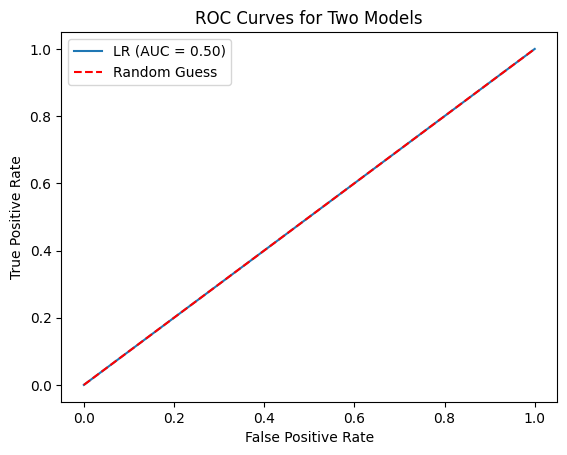

In [ ]:
y_pred_probs = trained_models["Logistic Regression"].predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
y_pred_adjusted = (y_pred_probs >= 3).astype(int)  # Apply the threshold

fpr, tpr, thresholds = roc_curve(y_test,y_pred_adjusted)


roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'{"LR"} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Two Models')
plt.legend()
plt.show()

# LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=b5d4b9db6ec3670352d5c9ffc7b90896582e58dbd3d7bb3512aa3c6998ed3597
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

### Best Models Correct Outputs

In [ ]:
died_loc = [6978, 32823, 37694]
not_died_loc = [6793, 6232, 1397]


In [ ]:
# Obtain correctly predicted True rows
X_test[(y_test == False) & (trained_models["Logistic Regression"].predict(X_test) == y_test)][:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Whostage,Current_Age,Educationallevel,MaritalStatus,Duration on ART (Days),bp_sys,bp_dia,Sex_Female,Sex_Male,Current_TB_Status_Disease diagnosed,Current_TB_Status_Disease suspected,Current_TB_Status_No signs or symptoms of disease,Current_TB_Status_On treatment for disease
19478,1,35,3.000000,0.0,12,168,118,False,True,False,False,True,False
7379,1,19,2.000000,0.0,3,120,70,True,False,False,False,True,False
9737,1,19,2.000000,0.0,4,106,54,True,False,False,False,True,False
1397,3,17,2.172991,0.0,6,115,71,True,False,False,False,True,False


In [ ]:
# Obtain correctly predicted True rows
X_test[(y_test == True) & (trained_models["Logistic Regression"].predict(X_test) == y_test)][:20]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Whostage,Current_Age,Educationallevel,MaritalStatus,Duration on ART (Days),bp_sys,bp_dia,Sex_Female,Sex_Male,Current_TB_Status_Disease diagnosed,Current_TB_Status_Disease suspected,Current_TB_Status_No signs or symptoms of disease,Current_TB_Status_On treatment for disease
5394,1,45,2.000000,0.000000,1647,100,80,True,False,False,False,True,False
29231,1,41,2.000000,0.000000,933,90,68,True,False,False,False,True,False
15938,1,22,3.000000,0.000000,1221,120,80,False,True,False,False,True,False
11235,1,60,2.000000,2.000000,1392,130,80,False,True,False,False,True,False
7223,1,17,2.000000,0.000000,908,110,70,False,True,False,False,True,False
6885,1,62,1.000000,2.000000,1517,100,80,True,False,False,False,True,False
11074,2,54,1.000000,1.000000,152,140,85,False,True,False,True,False,False
7794,1,61,2.000000,2.000000,1550,97,71,False,True,False,False,True,False
9000,3,38,2.000000,2.000000,495,80,50,True,False,False,False,False,True
16204,1,28,3.000000,0.000000,1207,120,80,False,True,False,False,True,False


### LIME Function

In [ ]:
## From - https://github.com/AjNavneet/Churn-Prediction-Ensemble-Techniques

# Define a function for LIME (Local Interpretable Model-agnostic Explanations)
def lime_explanation(model, X_train, X_test, chosen_index, class_names = ["Survived","Died"]):
    # Create a LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                      feature_names=X_train.columns,
                                                      class_names=class_names,
                                                       mode='classification')

    # Choose the specific instance to explain
    # chosen_instance = X_test.loc[[chosen_index]].values[0]
    chosen_instance = X_test.loc[chosen_index]


    # Generate the LIME explanation for the chosen instance
    explanation = explainer.explain_instance(chosen_instance,
                                            lambda x: model.predict_proba(x).astype(float),
                                            num_features=14)

    explanation.show_in_notebook(show_table=True, show_all=False)


    # # Convert the explanation to a Pyplot figure
    fig = explanation.as_pyplot_figure()


    # return fig

## Positive Class

### Model 1

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["Logistic Regression"], X_train, X_test, i)

### Model 2

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["Random Forest"], X_train, X_test, i)

### Model 3

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["Gradient Boosting"], X_train, X_test, i)

### Model 4

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["XGBoost"], X_train, X_test, i)

### Model 5

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["LightGBM"], X_train, X_test, i)

### Model 6

In [ ]:
for i in died_loc:
  lime_explanation(trained_models["CatBoost"], X_train, X_test, i)

### Model 7

In [ ]:
# for i in died_loc:
#   lime_explanation(trained_models["ANN"], X_train, X_test, i)

## Negative Class

### Model 1

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["Logistic Regression"], X_train, X_test, i)

### Model 2

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["Random Forest"], X_train, X_test, i)

### Model 3

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["Gradient Boosting"], X_train, X_test, i)

### Model 4

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["XGBoost"], X_train, X_test, i)

### Model 5

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["LightGBM"], X_train, X_test, i)

### Model 6

In [ ]:
for i in not_died_loc:
  lime_explanation(trained_models["CatBoost"], X_train, X_test, i)

### Model 7

In [ ]:
# for i in not_died_loc:
#   lime_explanation(trained_models["ANN"], X_train, X_test, i)

In [ ]:
trained_models.keys()

# SHAP

In [ ]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
import shap


### Model 1

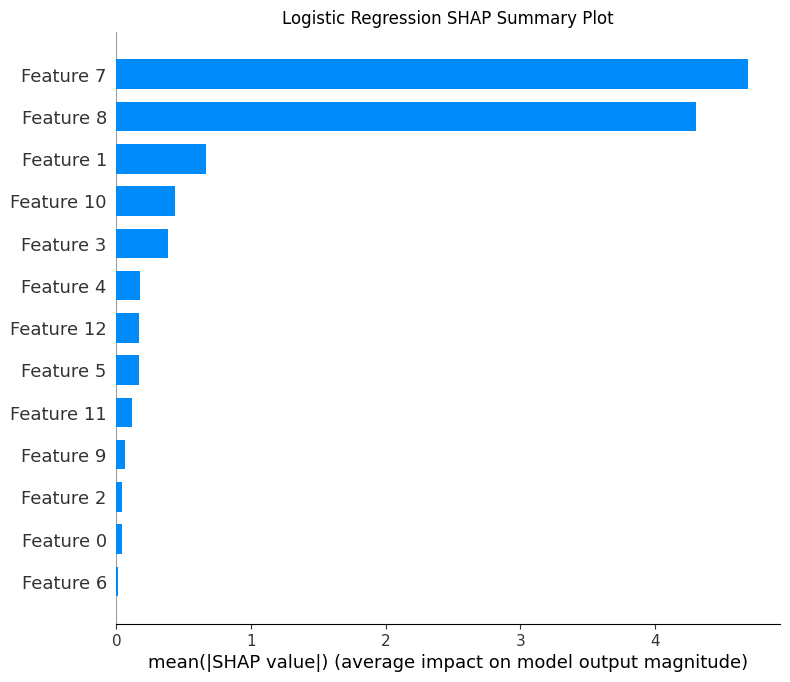

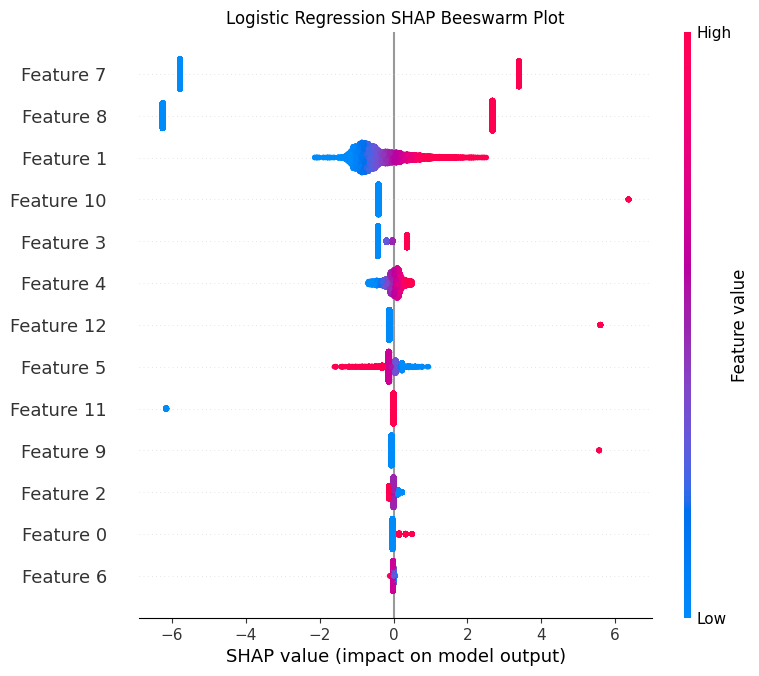

In [ ]:
# Generate SHAP values for Logistic Regression model
explainer_lr = shap.Explainer(trained_models['Logistic Regression'], X_train_res_scaled)
shap_values_lr = explainer_lr(X_test_scaled)

# Visualize SHAP values for Logistic Regression model
shap.summary_plot(shap_values_lr, X_test_scaled, plot_type="bar", show=False)
plt.title("Logistic Regression SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_lr, X_test_scaled, show=False)
plt.title("Logistic Regression SHAP Beeswarm Plot")
plt.show()

In [ ]:
# indices used by SHAP plot
shap_indices = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12]

# Mapping indices to feature names
mapped_features = [feature_names[i] for i in shap_indices]

# Print mapping
for idx, feature in zip(shap_indices, mapped_features):
    print(f"Feature index {idx} corresponds to '{feature}'")

Feature index 0 corresponds to 'Whostage'
Feature index 1 corresponds to 'Current_Age'
Feature index 2 corresponds to 'Educationallevel'
Feature index 3 corresponds to 'MaritalStatus'
Feature index 4 corresponds to 'Duration on ART (Days)'
Feature index 5 corresponds to 'bp_sys'
Feature index 6 corresponds to 'bp_dia'
Feature index 7 corresponds to 'Sex_Female'
Feature index 8 corresponds to 'Sex_Male'
Feature index 9 corresponds to 'Current_TB_Status_Disease diagnosed'
Feature index 10 corresponds to 'Current_TB_Status_Disease suspected'
Feature index 11 corresponds to 'Current_TB_Status_No signs or symptoms of disease'
Feature index 12 corresponds to 'Current_TB_Status_On treatment for disease'


In [ ]:
pd.DataFrame(shap_values_lr.values, columns=feature_names)

,Whostage,Current_Age,Educationallevel,MaritalStatus,Duration on ART (Days),bp_sys,bp_dia,Sex_Female,Sex_Male,Current_TB_Status_Disease diagnosed,Current_TB_Status_Disease suspected,Current_TB_Status_No signs or symptoms of disease,Current_TB_Status_On treatment for disease
0,-0.026610,-0.564867,-0.117645,-0.424443,-0.479476,-0.129759,0.004972,3.396187,-6.251225,-0.056244,-0.406329,-2.001720e-16,-0.114341
1,-0.026610,-0.506812,-0.000369,-0.424443,0.134216,-0.129759,-0.008878,-5.782697,2.679097,-0.056244,-0.406329,-2.001720e-16,-0.114341
2,-0.026610,-0.506812,0.116906,-0.188547,0.358330,0.229187,0.018822,3.396187,-6.251225,-0.056244,-0.406329,-2.001720e-16,-0.114341
3,0.150789,1.292865,0.116906,0.364223,0.214477,-0.129759,0.004972,-5.782697,2.679097,-0.056244,-0.406329,-2.001720e-16,-0.114341
4,-0.026610,-0.448758,-0.117645,0.364223,-0.630120,-1.386070,-0.064279,3.396187,-6.251225,-0.056244,-0.406329,-2.001720e-16,-0.114341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10323,-0.026610,-0.739029,-0.117645,-0.424443,-0.314631,0.049714,0.004972,-5.782697,2.679097,-0.056244,-0.406329,-2.001720e-16,-0.114341
10324,-0.026610,0.131783,-0.000369,-0.030110,0.126190,0.049714,0.004972,3.396187,-6.251225,-0.056244,-0.406329,-2.001720e-16,-0.114341
10325,-0.026610,-0.913191,-0.018689,-0.424443,0.247199,-0.129759,-0.008878,-5.782697,2.679097,-0.056244,-0.406329,-2.001720e-16,-0.114341
10326,-0.026610,-0.332650,-0.000369,-0.424443,0.189781,-0.093864,-0.015803,3.396187,-6.251225,-0.056244,-0.406329,-2.001720e-16,-0.114341


In [ ]:
# Validate and map indices
if all(0 <= idx < len(feature_names) for idx in shap_indices):
    mapped_features = [feature_names[i] for i in shap_indices]
    print("Mapped Features:")
    for idx, feature in zip(shap_indices, mapped_features):
        print(f"Feature index {idx} corresponds to '{feature}'")
else:
    print("Error: One or more indices are out of range.")

Mapped Features:
Feature index 0 corresponds to 'Whostage'
Feature index 1 corresponds to 'Current_Age'
Feature index 2 corresponds to 'Educationallevel'
Feature index 3 corresponds to 'MaritalStatus'
Feature index 4 corresponds to 'Duration on ART (Days)'
Feature index 5 corresponds to 'bp_sys'
Feature index 6 corresponds to 'bp_dia'
Feature index 7 corresponds to 'Sex_Female'
Feature index 8 corresponds to 'Sex_Male'
Feature index 9 corresponds to 'Current_TB_Status_Disease diagnosed'
Feature index 10 corresponds to 'Current_TB_Status_Disease suspected'
Feature index 11 corresponds to 'Current_TB_Status_No signs or symptoms of disease'
Feature index 12 corresponds to 'Current_TB_Status_On treatment for disease'


In [ ]:
shap_values_lr[0]

.values =
array([-2.66098617e-02, -5.64866535e-01, -1.17644508e-01, -4.24442600e-01,
       -4.79475695e-01, -1.29758951e-01,  4.97221224e-03,  3.39618710e+00,
       -6.25122546e+00, -5.62441639e-02, -4.06328670e-01, -2.00171958e-16,
       -1.14340763e-01])

.base_values =
2.9602212114455746

.data =
array([-0.32100232, -0.5763194 ,  1.73099131, -1.03846517, -1.9734765 ,
        0.42372437, -0.45495911,  0.77818516, -1.26603023, -0.10244867,
       -0.22737308,  0.1325    , -0.21767897])

In [ ]:
# Create a DataFrame for easier mapping
shap_df = pd.DataFrame(shap_values_lr.values, columns=feature_names)

.values =
array([-2.66098617e-02, -5.64866535e-01, -1.17644508e-01, -4.24442600e-01,
       -4.79475695e-01, -1.29758951e-01,  4.97221224e-03,  3.39618710e+00,
       -6.25122546e+00, -5.62441639e-02, -4.06328670e-01, -2.00171958e-16,
       -1.14340763e-01])

.base_values =
2.9602212114455746

.data =
array([-0.32100232, -0.5763194 ,  1.73099131, -1.03846517, -1.9734765 ,
        0.42372437, -0.45495911,  0.77818516, -1.26603023, -0.10244867,
       -0.22737308,  0.1325    , -0.21767897])

### Model 2

100%|===================| 11948/11960 [11:50<00:00]       

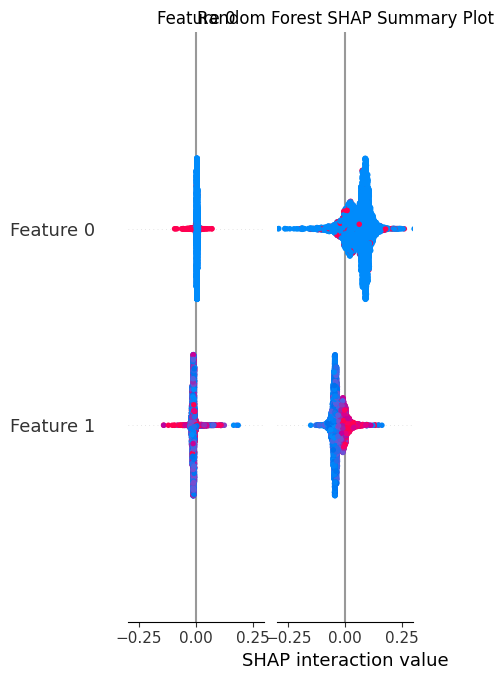

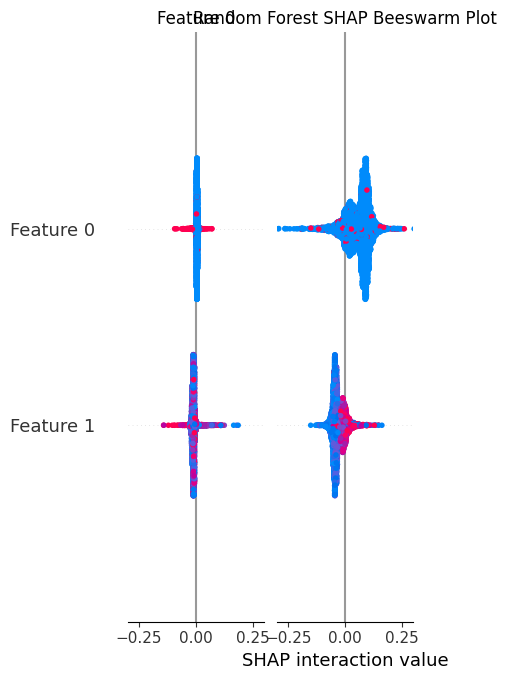

In [ ]:
# Generate SHAP values for RandomForest model
explainer_rf = shap.Explainer(trained_models['Random Forest'], X_train_res_scaled)
shap_values_rf = explainer_rf(X_test_scaled, check_additivity=False)

# Visualize SHAP values for RandomForest model
shap.summary_plot(shap_values_rf, X_test_scaled, plot_type="bar", show=False)
plt.title("Random Forest SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_rf, X_test_scaled, show=False)
plt.title("Random Forest SHAP Beeswarm Plot")
plt.show()

### Model 3

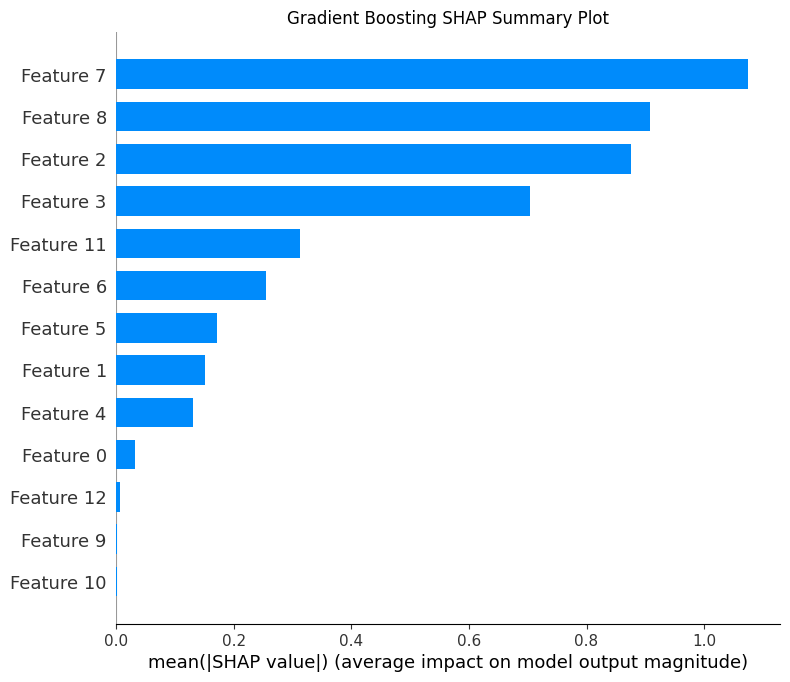

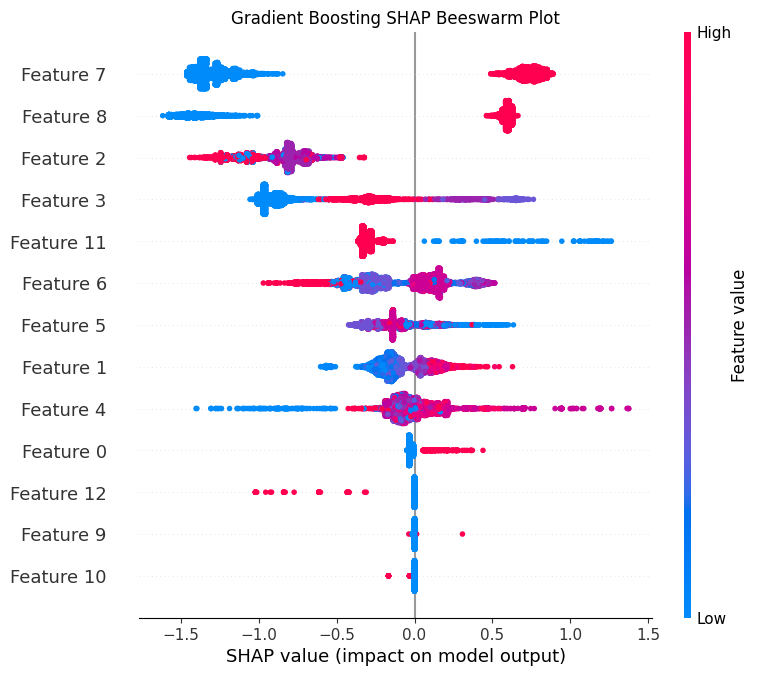

In [ ]:
# Generate SHAP values for GradientBoosting model
explainer_gb = shap.Explainer(trained_models['Gradient Boosting'], X_train_res_scaled)
shap_values_gb = explainer_gb(X_test_scaled)

# Visualize SHAP values for GradientBoosting model
shap.summary_plot(shap_values_gb, X_test_scaled, plot_type="bar", show=False)
plt.title("Gradient Boosting SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_gb, X_test_scaled, show=False)
plt.title("Gradient Boosting SHAP Beeswarm Plot")
plt.show()

### Model 4

 99%|===================| 5909/5980 [00:48<00:00]       

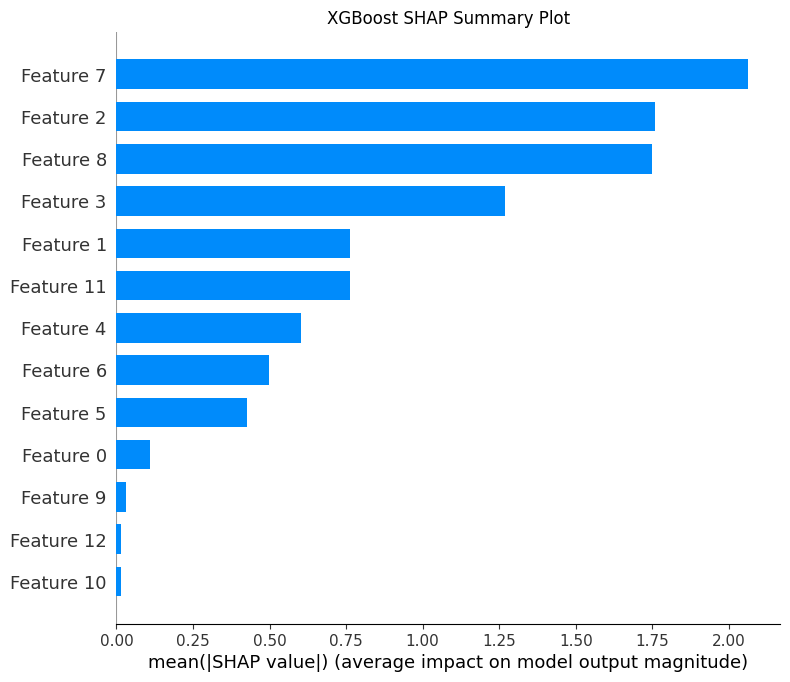

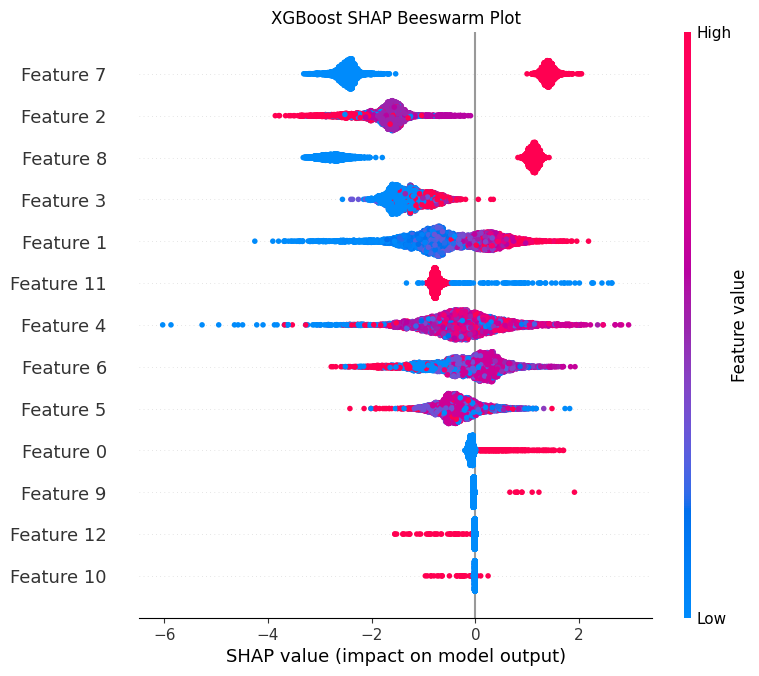

In [ ]:
# Generate SHAP values for XGBoost model
explainer_xgb = shap.Explainer(trained_models['XGBoost'], X_train_res_scaled)
shap_values_xgb = explainer_xgb(X_test_scaled)

# Visualize SHAP values for XGBoost model
shap.summary_plot(shap_values_xgb, X_test_scaled, plot_type="bar", show=False)
plt.title("XGBoost SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_xgb, X_test_scaled, show=False)
plt.title("XGBoost SHAP Beeswarm Plot")
plt.show()

### Model 5

 97%|=================== | 5780/5980 [00:31<00:01]       

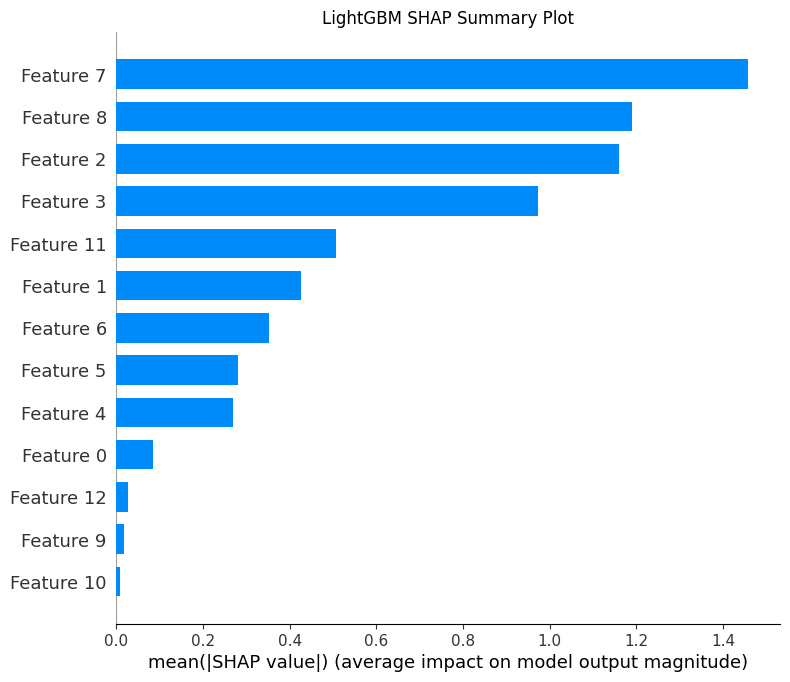

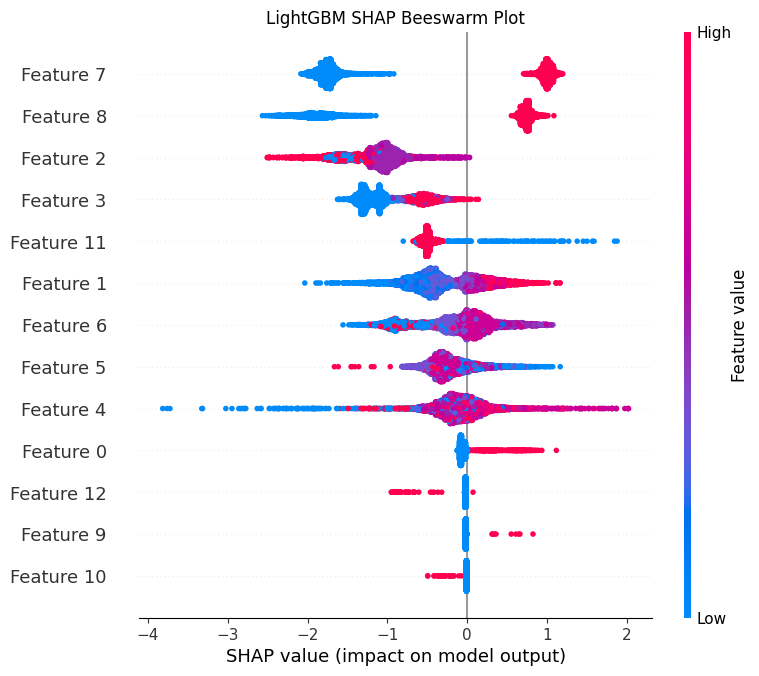

In [ ]:
# Generate SHAP values for LightGBM model
explainer_lgbm = shap.Explainer(trained_models['LightGBM'], X_train_res_scaled)
shap_values_lgbm = explainer_lgbm(X_test_scaled)

# Visualize SHAP values for LightGBM model
shap.summary_plot(shap_values_lgbm, X_test_scaled, plot_type="bar", show=False)
plt.title("LightGBM SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_lgbm, X_test_scaled, show=False)
plt.title("LightGBM SHAP Beeswarm Plot")
plt.show()



### Model 6

100%|===================| 5966/5980 [06:12<00:00]       

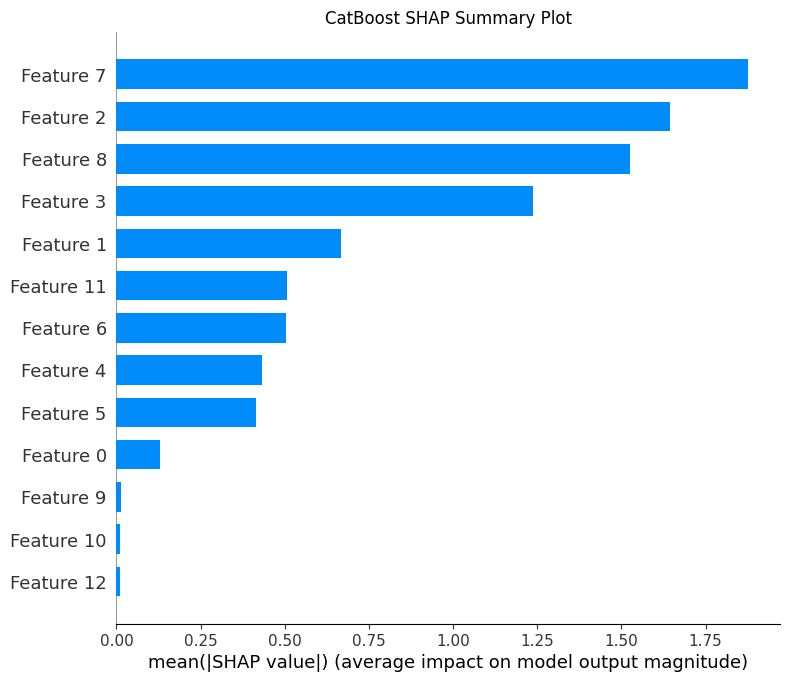

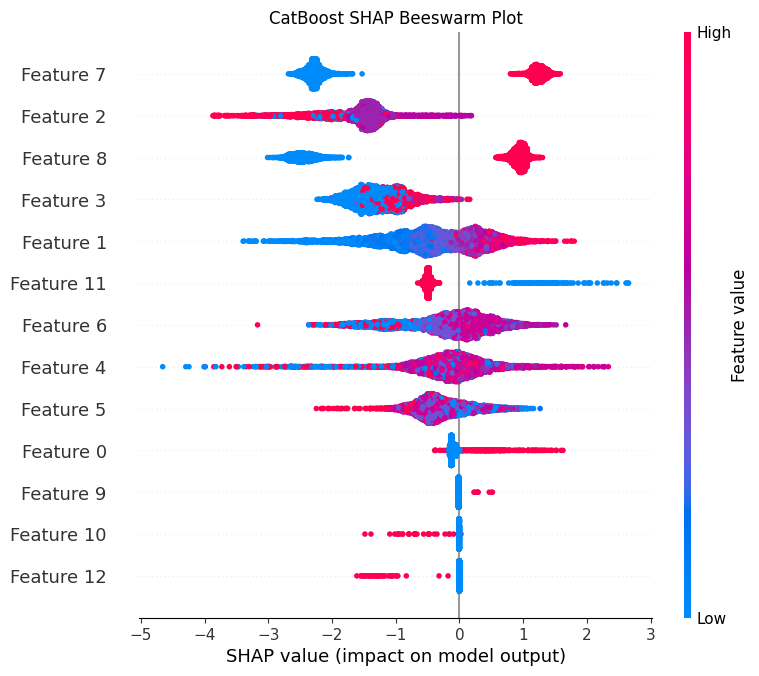

In [ ]:
# Generate SHAP values for CatBoost model
explainer_cb = shap.Explainer(trained_models['CatBoost'], X_train_res_scaled)
shap_values_cb = explainer_cb(X_test_scaled)

# Visualize SHAP values for CatBoost model
shap.summary_plot(shap_values_cb, X_test_scaled, plot_type="bar", show=False)
plt.title("CatBoost SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_cb, X_test_scaled, show=False)
plt.title("CatBoost SHAP Beeswarm Plot")
plt.show()

### Model 7 (ANN)

In [ ]:
# Generate SHAP values for the ANN model
explainer_ann = shap.DeepExplainer(trained_models['ANN'], X_train_res_scaled)
shap_values_ann = explainer_ann.shap_values(X_test_scaled)

# Visualize SHAP values for the ANN model
shap.summary_plot(shap_values_ann, X_test_scaled, plot_type="bar", show=False)
plt.title("ANN SHAP Summary Plot")
plt.show()

shap.summary_plot(shap_values_ann, X_test_scaled, show=False)
plt.title("ANN SHAP Beeswarm Plot")
plt.show()


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


KeyboardInterrupt: 

In [ ]:
!pip install captum


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

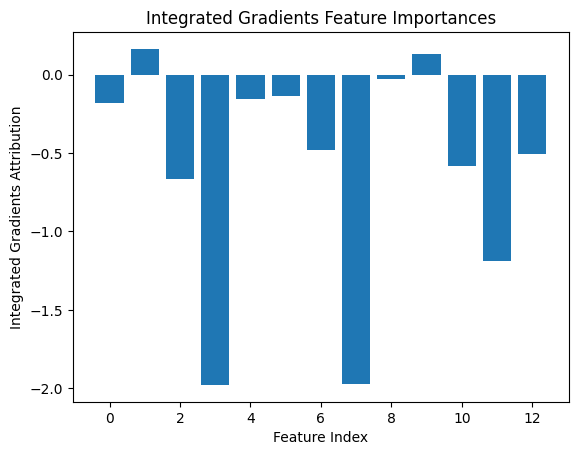

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from captum.attr import IntegratedGradients
import numpy as np

# Assuming X_train_res_scaled and y_train_res are numpy arrays

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_res_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_res.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define a simple ANN model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(X_train_res_scaled.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Assuming binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate and train the model
model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Apply Integrated Gradients
ig = IntegratedGradients(model)
X_test_tensor.requires_grad_()

# Compute attributions
attributions, delta = ig.attribute(X_test_tensor, target=1, return_convergence_delta=True)

# Visualize attributions
import matplotlib.pyplot as plt

# Summarize attributions per feature
attributions_sum = attributions.mean(dim=0).detach().numpy()

plt.bar(range(X_test_scaled.shape[1]), attributions_sum)
plt.xlabel('Feature Index')
plt.ylabel('Integrated Gradients Attribution')
plt.title('Integrated Gradients Feature Importances')
plt.show()


In [ ]:
!pip install innvestigate


  Using cached innvestigate-2.1.2-py3-none-any.whl.metadata (12 kB)
  Using cached tensorflow-2.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
Using cached innvestigate-2.1.2-py3-none-any.whl (66 kB)
Using cached tensorflow-2.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.14.1 which is incompatible.


In [ ]:
import keras
import innvestigate
import innvestigate.utils as iutils
import numpy as np
import matplotlib.pyplot as plt

# Convert your data to Keras-compatible format if needed
X_train_keras = np.array(X_train_res_scaled)
y_train_keras = keras.utils.to_categorical(y_train_res.values, num_classes=2)
X_test_keras = np.array(X_test_scaled)

# Define a simple ANN model using Keras
model = keras.models.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_res_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')  # Assuming binary classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_keras, y_train_keras, epochs=10, batch_size=32, verbose=1)

# Apply LRP
analyzer = innvestigate.create_analyzer("lrp.epsilon", model)
analysis = analyzer.analyze(X_test_keras)

# Visualize the relevance scores for the first test sample
plt.bar(range(X_test_scaled.shape[1]), analysis[0])
plt.xlabel('Feature Index')
plt.ylabel('Relevance Score')
plt.title('Layer-wise Relevance Propagation (LRP) Feature Importances')
plt.show()


ModuleNotFoundError: No module named 'tensorflow.keras.backend'